In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from nltk.cluster import KMeansClusterer, cosine_distance

import json
from numpy.random import shuffle

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.decomposition import LatentDirichletAllocation

from scipy.cluster.hierarchy import cut_tree

from sklearn import metrics
import numpy as np

import csv

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics.pairwise import cosine_similarity


In [10]:
#Selecting Each company and running one model for all
list_to_use1 = ['Microsoft','Netflix','amazon','Boeing','Google','Facebook']
for company in list_to_use1:
    with open("C:/Users/rajpu/Desktop/Web analytics Final/Data/"+company.lower()+".csv", "r") as f:
        reader=csv.reader(f, delimiter=',') 
        rows=[(row[1][2],row[1][4]) \
          for row in enumerate(reader)]
    shuffle(rows)
    print(company)
#rows
    text,target=zip(*rows)
    text=list(text)
    target=list(target)
    tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 

# generate tfidf matrix
    dtm= tfidf_vect.fit_transform(text)
    #print (dtm.shape)

    num_clusters=2
    clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, repeats=10)
    clusters = clusterer.cluster(dtm.toarray(), \
                            assign_clusters=True)


    #print(clusters[0:5])

    centroids=np.array(clusterer.means())

# argsort sort the matrix in ascending order 
# and return locations of features before sorting
# [:,::-1] reverse the order
    sorted_centroids = centroids.argsort()[:, ::-1] 

# The mapping between feature (word)
# index and feature (word) can be obtained by
# the vectorizer's function get_feature_names()
    voc_lookup= tfidf_vect.get_feature_names()

    for i in range(num_clusters):
    
    # get words with top 20 tf-idf weight in the centroid
        top_words=[voc_lookup[word_index] \
               for word_index in sorted_centroids[i, :20]]
        print("Cluster %d: %s " % (i, "; ".join(top_words)))

    df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
    #df.head()
    #pd.crosstab( index=df.cluster, columns=df.actual_class)


    cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}


# Assign true class to cluster
    predicted_target=[cluster_dict[i] for i in clusters]

    print(metrics.classification_report\
      (target, predicted_target))
    # Kmeans with 10 different centroid seeds
    km = KMeans(n_clusters=num_clusters, n_init=10).fit(dtm)
    clusters = km.labels_.tolist()

    df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
    #df.head()
    #pd.crosstab( index=df.cluster, columns=df.actual_class)

    cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}

# Assign true class to cluster
    predicted_clusters=[cluster_dict[i] for i in clusters]

    #print(metrics.classification_report\
     # (target, predicted_clusters))
    
    print('K-Means with Euclidean Distance')
    
    from sklearn.cluster import KMeans

# Kmeans with 10 different centroid seeds
    km = KMeans(n_clusters=num_clusters, n_init=10).fit(dtm)
    clusters = km.labels_.tolist()
    df=pd.DataFrame(list(zip(target, clusters)), \
                columns=['actual_class','cluster'])
    #df.head()
    #pd.crosstab( index=df.cluster, columns=df.actual_class)
    cluster_dict={1:"reviews are negative",\
              0:'reviews are positive'}


# Assign true class to cluster
    predicted_clusters=[cluster_dict[i] for i in clusters]

    print(metrics.classification_report\
      (target, predicted_clusters))    


Microsoft
Cluster 0: microsoft; said; company; reuters; advertisement; page; information; according; software; diversity; reporting; 000; customers; editing; reutersmarch; employees; google; technology; new; chief 
Cluster 1: percent; mr; data; billion; stocks; trump; investors; said; million; people; value; growth; president; market; year; facebook; advertisement; companies; rose; tariffs 
                      precision    recall  f1-score   support

reviews are negative       0.27      0.33      0.30         9
reviews are positive       0.33      0.27      0.30        11

         avg / total       0.31      0.30      0.30        20

K-Means with Euclidean Distance
                      precision    recall  f1-score   support

reviews are negative       0.33      0.44      0.38         9
reviews are positive       0.38      0.27      0.32        11

         avg / total       0.36      0.35      0.35        20

Netflix
Cluster 0: disney; percent; said; mr; advertisement; company; mi

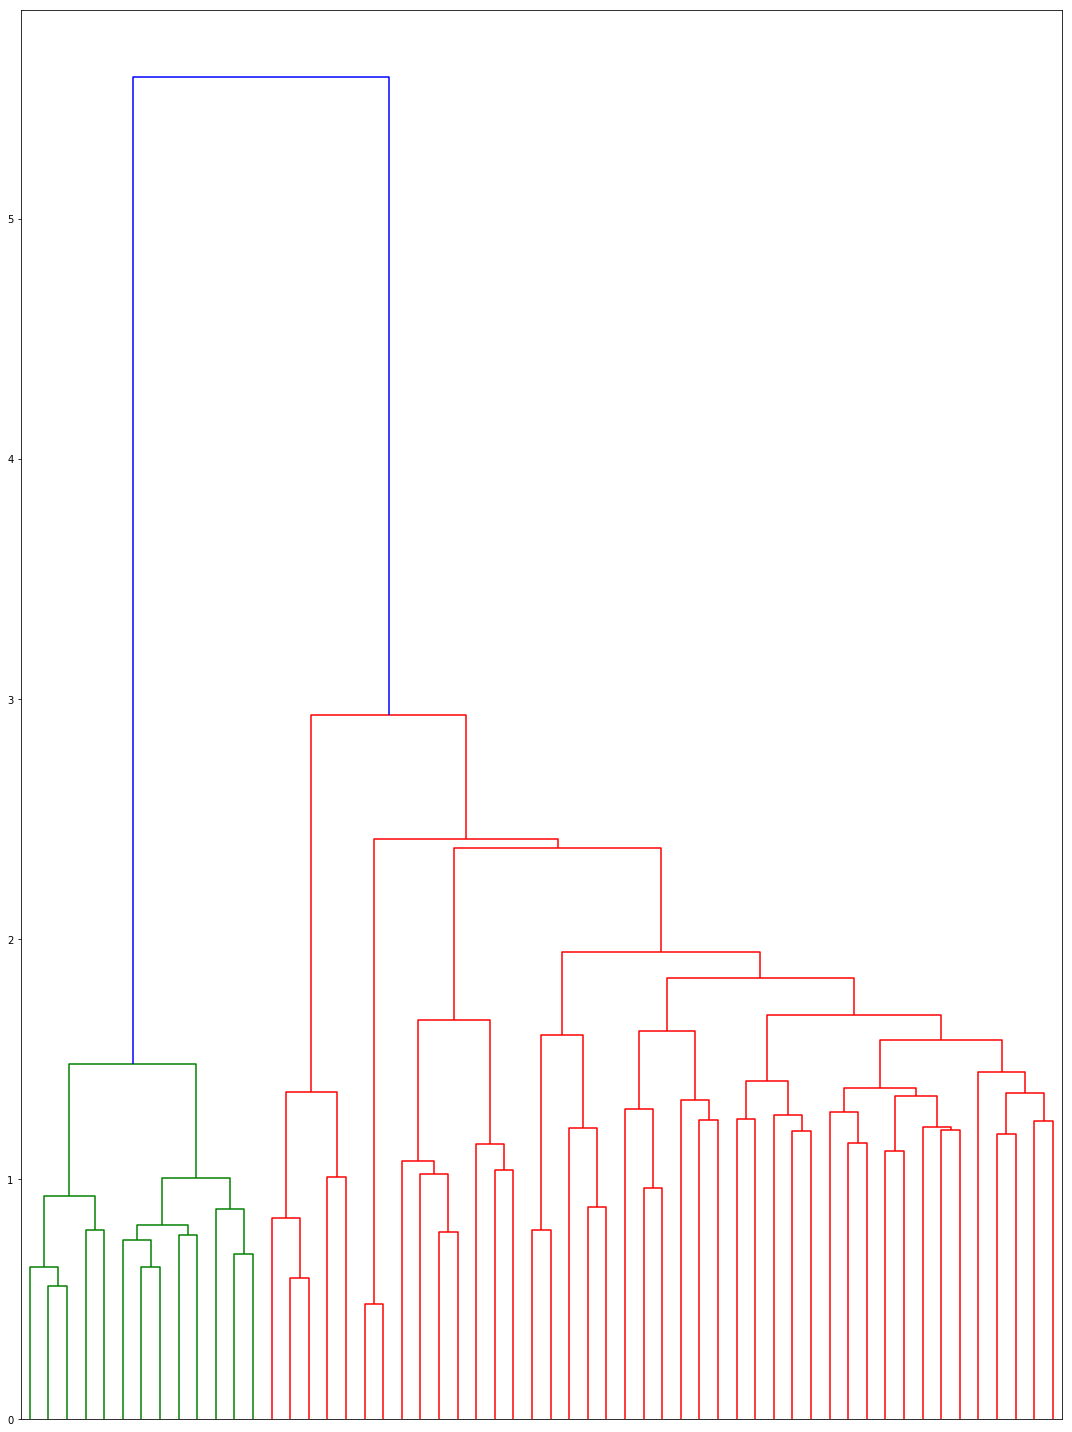

In [11]:
# distance between any pair of documents

dist = 1 - cosine_similarity(dtm)

# create a linkage matrix using ward's method
# the linkage matrix contains the dendragram data
# in ward methods, the distance between two clusters
# is measured as the sum of distance 
# from each sample to the cluster center 

#linkage_matrix = average(dist)
linkage_matrix = linkage(dist, method='ward')

# plot the dendrogram
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout